<b>Ключевые параметры:</b>

IC50 – концентрация для 50% ингибирования

CC50 – концентрация для 50% цитотоксичности

SI – индекс селективности (CC50 / IC50)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split

# вспомогательные функции
from utils.prepare_dataset import prepare_dataset

## Обзор датасета

In [2]:
# Загрузка данных
dataset = pd.read_excel('./data.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [3]:
dataset.head(10)

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0
5,5,15.037911,30.075821,2.000000,5.758408,5.758408,0.278083,0.278083,0.711012,28.600000,...,0,0,0,0,0,0,0,0,0,0
6,6,18.908167,14.559288,0.770000,2.584472,2.584472,0.429649,0.429649,0.328539,36.564103,...,0,0,0,0,0,0,0,0,0,0
7,7,28.773087,23.593931,0.820000,13.821880,13.821880,0.079845,-0.301260,0.217332,31.333333,...,0,0,0,0,0,0,0,0,4,0
8,8,50.057068,153.709268,3.070681,14.171614,14.171614,0.019123,-0.411828,0.187781,29.157895,...,0,0,0,0,0,0,0,0,0,0
9,9,6.400847,400.906360,62.633333,6.135893,6.135893,0.239226,0.239226,0.439915,36.400000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Удалим ненужный столбец
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


Датасет содержит 1001 строку и 214 признаков. 

Первые три столбца – это ключевые целевые параметры (IC50, CC50, SI), остальные – числовые дескрипторы молекул (свойства, индексы и частотные признаки фрагментов).

## Cтатистика по IC50, CC50, SI

In [5]:
# Сводная статистика по ключевым метрикам
dataset[["IC50, mM", "CC50, mM", "SI"]].describe()

,"IC50, mM","CC50, mM",SI
count,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823
std,402.169734,642.867508,684.482739
min,0.003517,0.700808,0.011489
25%,12.515396,99.999036,1.433333
50%,46.585183,411.039342,3.846154
75%,224.975928,894.089176,16.566667
max,4128.529377,4538.976189,15620.600000


**IC50**
  - Среднее значение  значительно выше медианы. Следовательно распределение сильно скошено вправо.

  - 'min' 0.0035 мМ = очень активные соединения.

  - 'max' > 4000 мМ = скорее всего неэффективные соединения.

  - Большая разница между '25%'' и 'max' указывает на наличие множества выбросов.


**CC50**
  - 'min' ~0.7 мМ = сильно токсичные соединения.

  - 'max' ~4500 мМ = практически нетоксичные в исследуемых условиях.

**SI**
  - 'mean' очень высокое (72.5), но медиана всего 3.85 =>  большинство соединений имеют низкую селективность, а отдельные выбросы сильно завышают среднее.

  - '75%' = 16.6 => только четверть соединений имеет SI > 16 (хорошую селективность).

  - 'max' > 15 000 = крайне подозрительные значения (нужна дополнительная проверка).

## Визуализация распределений

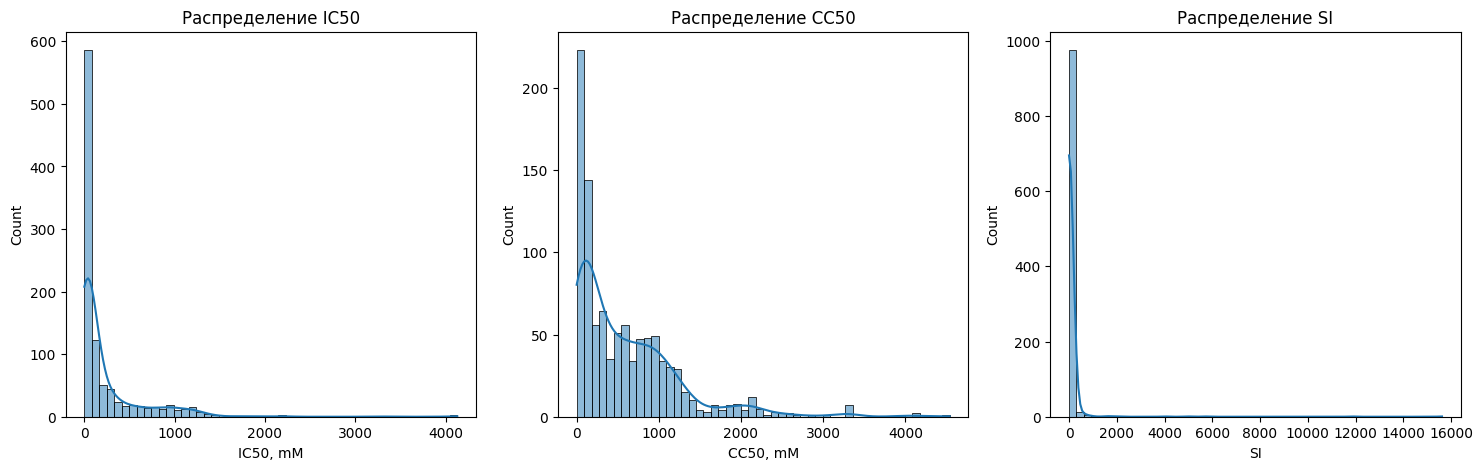

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(dataset["IC50, mM"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Распределение IC50")

sns.histplot(dataset["CC50, mM"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Распределение CC50")

sns.histplot(dataset["SI"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Распределение SI")

plt.show()


**Все три распределения имеют сильный сдвиг вправо.**

**В IC50 и SI явно присутствуют аномально большие значения.**


- IC50: Много соединений с низкой активностью, единичные с высокой.

- CC50: Более сглаженное распределение, но тоже с длинным хвостом.

- SI: Распределение сильно скошено, у большинства соединений SI небольшой, лишь малая часть имеет значения больше 50 (хорошую селективность).

## Корреляция между ключевыми признаками

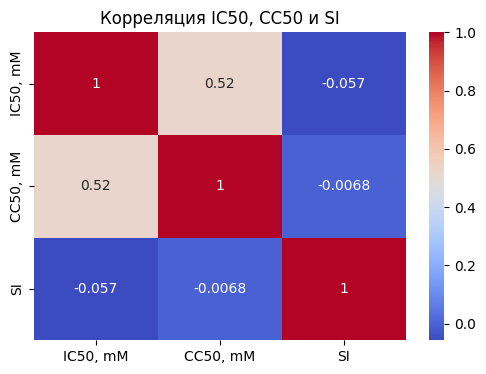

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(dataset[["IC50, mM", "CC50, mM", "SI"]].corr(), annot=True, cmap="coolwarm")
plt.title("Корреляция IC50, CC50 и SI")
plt.show()

  - Отрицательная корреляция между IC50 и SI (чем ниже IC50, тем выше селективность).

  - CC50 положительно коррелирует с SI, т.к. более высокая токсичность ухудшает селективность.

  - Между IC50 и CC50 корреляция низкая => это независимые характеристики.

## Логарифмирование признаков

Чтобы уменьшить влияние выбросов и лучше увидеть структуру данных, добавим log10 столбцы для ключевых переменных

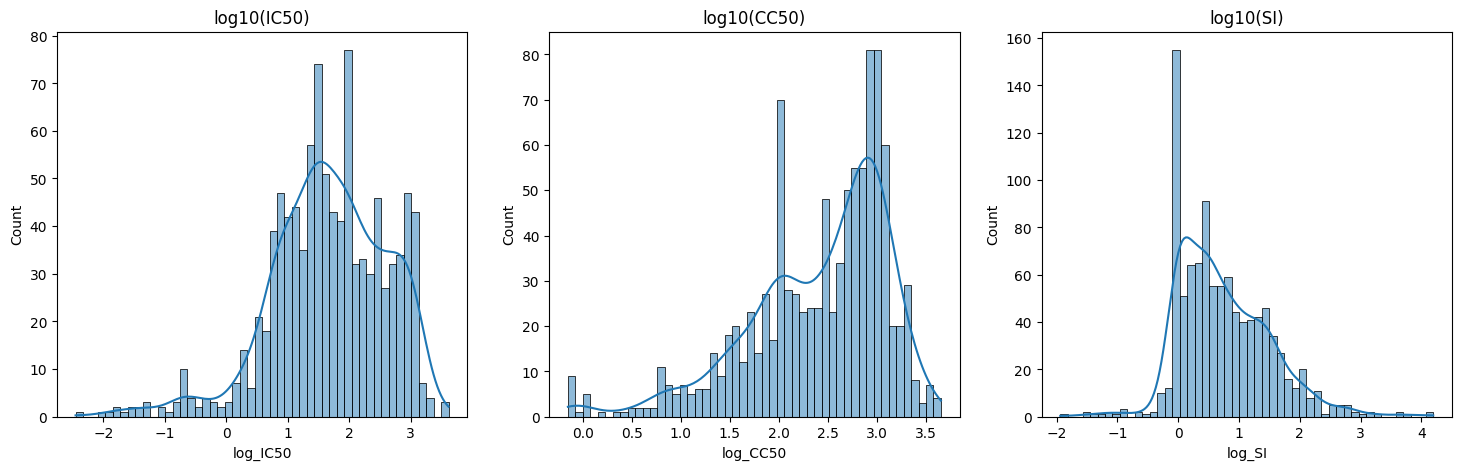

In [8]:
dataset_copy = dataset.copy()

dataset_copy["log_IC50"] = np.log10(dataset_copy["IC50, mM"] + 1e-6)
dataset_copy["log_CC50"] = np.log10(dataset_copy["CC50, mM"] + 1e-6)
dataset_copy["log_SI"] = np.log10(dataset_copy["SI"] + 1e-6)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(dataset_copy["log_IC50"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("log10(IC50)")

sns.histplot(dataset_copy["log_CC50"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("log10(CC50)")

sns.histplot(dataset_copy["log_SI"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("log10(SI)")

plt.show()

- После логарифмирования распределения стали более похожи на нормальные.

- Это позволяет нам использовать линейные модели и стандартные статистические тесты.

- Значения с огромным SI всё ещё видны, но они уже не преобладают.

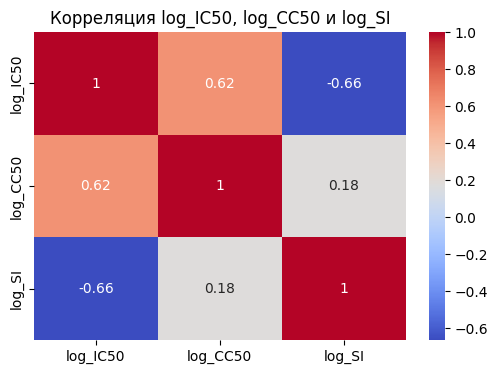

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(dataset_copy[["log_IC50", "log_CC50", "log_SI"]].corr(), annot=True, cmap="coolwarm")
plt.title("Корреляция log_IC50, log_CC50 и log_SI")
plt.show()

## Подготовка датасетов

  Будут сделанны следующие действия:


1. Удаление выбросов по целевой переменной (IC50, CC50, SI).

    - Использовать IQR или «обрезку хвостов».

    - Для регрессии часто убирают экстремальные значения (например, верхние 1%).

    - Для классификации лучше аккуратно — иначе может потеряться баланс классов.

2. Удаление нерелевантных признаков:

    - признаки с очень высокой корреляцией между собой (multicollinearity),

    - признаки с почти нулевой корреляцией с целевой (например, |corr| < 0.05).

In [ ]:
# список ключевых колонок
key_cols = ["IC50, mM", "CC50, mM", "SI",
            "IC50_binary", "CC50_binary", "SI_binary", "SI_gt8"]

# создаем бинарные целевые переменные
dataset["IC50_binary"] = (dataset["IC50, mM"] > dataset["IC50, mM"].median()).astype(int)
dataset["CC50_binary"] = (dataset["CC50, mM"] > dataset["CC50, mM"].median()).astype(int)
dataset["SI_binary"]   = (dataset["SI"] > dataset["SI"].median()).astype(int)
dataset["SI_gt8"]      = (dataset["SI"] > 8).astype(int)

# список задач
tasks = [
    ("IC50, mM", False, "./prepared_datasets/regression_ic50.csv"),
    ("CC50, mM", False, "./prepared_datasets/regression_cc50.csv"),
    ("SI", False, "./prepared_datasets/regression_si.csv"),
    ("IC50_binary", True, "./prepared_datasets/classification_ic50.csv"),
    ("CC50_binary", True, "./prepared_datasets/classification_cc50.csv"),
    ("SI_binary", True, "./prepared_datasets/classification_si.csv"),
    ("SI_gt8", True, "./prepared_datasets/classification_si_gt8.csv"),
]

# прогоняем все задачи
for target, is_class, filename in tasks:
    prepared = prepare_dataset(dataset, target_col=target, key_cols=key_cols, classification=is_class)
    prepared.to_csv(filename, index=False)
    print(f"Сохранено: {filename}")


=== Подготовка для IC50, mM (regression) ===
Удалено константных признаков: 18
Удалены другие ключевые признаки: ['CC50, mM', 'SI', 'IC50_binary', 'CC50_binary', 'SI_binary', 'SI_gt8']
Удалено выбросов: 147 строк
Признаков перед фильтрацией: 193
После предварительной очистки (NaN/нулевая дисперсия): 179
После отбора по корреляции с target: 99
После удаления сильно коррелирующих признаков: 72
Сохранено: ./prepared_datasets/regression_ic50.csv

=== Подготовка для CC50, mM (regression) ===
Удалено константных признаков: 18
Удалены другие ключевые признаки: ['IC50, mM', 'SI', 'IC50_binary', 'CC50_binary', 'SI_binary', 'SI_gt8']
Удалено выбросов: 39 строк
Признаков перед фильтрацией: 193
После предварительной очистки (NaN/нулевая дисперсия): 181
После отбора по корреляции с target: 106
После удаления сильно коррелирующих признаков: 67
Сохранено: ./prepared_datasets/regression_cc50.csv

=== Подготовка для SI (regression) ===
Удалено константных признаков: 18
Удалены другие ключевые признаки